# Prepare the dataset

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
random.seed(666)

In [6]:
df = pd.read_excel('dataclus1.xlsx')

In [7]:
X = df.iloc[:,1:5]

In [8]:
y2 = df.iloc[:,5]
y3 = df.iloc[:,6]
y4 = df.iloc[:,7]
y5 = df.iloc[:,8]
y6 = df.iloc[:,9]
y7 = df.iloc[:,10]

# Multi-classification algorithms
## 1. K Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y3,train_size=0.8, random_state=666)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

## 2. Random Forest

### 2.1 Basic

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Cross-validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean

# Define the model
model = RandomForestClassifier()
# Evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state = 666)
n_scores = cross_val_score(model, X, y3, scoring='accuracy',cv=cv, n_jobs=-1,error_score='raise')
# Report Performance
print(mean(n_scores))

0.8903401865197119


### 2.2 Hyperparameters

>0.1 0.881 (000)
>0.2 0.884 (000)
>0.3 0.888 (000)
>0.4 0.887 (000)
>0.5 0.887 (000)
>0.6 0.889 (000)
>0.7 0.890 (000)
>0.8 0.889 (000)
>0.9 0.889 (000)
>1.0 0.891 (000)


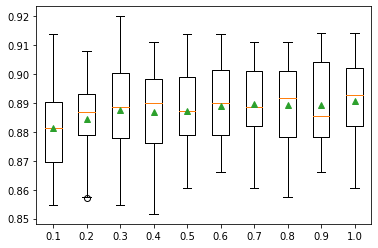

In [12]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import  matplotlib.pyplot as plt

# Get a list of models to evaluate
# max_sample set from 0 to 1 to control the percentage of the size of the trainig dataset
# Smaller sample size makes the tree more different
def get_models():
  models = dict()
  # ratios increased from 10% to 100% with 10% incresments
  for i in arange(0.1,1.1,0.1):
    key = '%.1f' % i
    # set max_samples=None to use 100%
    if i == 1.0:
      i = None
    models[key] = RandomForestClassifier(max_samples=i)
  return models

# evaluate a given model using cross-validation
def evaluate_model(model, X,y):
  # define the evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=666)
  # evaluate the model and collect the results
  scores = cross_val_score(model, X, y,scoring='accuracy',cv=cv,n_jobs=-1)
  return scores

# Define the dataset
X,y = X, y3

# Get the models to evaluate
models = get_models()

# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  # evaluate the model
  scores = evaluate_model(model,X,y)
  # store the results
  results.append(scores)
  names.append(name)
  # summarize the performance along the way
  print('>%s %.3f (%.3d)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()


### 2.3 Explore Number of Trees
Very unlikely to overfit and start from 1000 trees

>10 0.890 (000)
>50 0.890 (000)
>100 0.890 (000)
>500 0.890 (000)
>1000 0.890 (000)


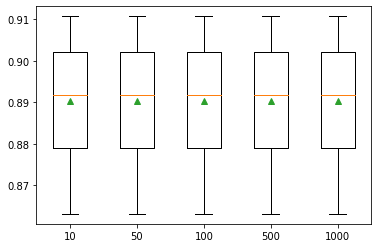

In [17]:
# get a list of models to evaluate
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import  matplotlib.pyplot as plt
def get_models():
  models = dict()
  # define number of trees to consider 
  n_trees = [10,50,100,500,1000]
  for n in n_trees:
    models[str(n)] = RandomForestClassifier(n_estimators=n)
  return models

# evaluate the model with cross validation
def evaluate_model(model, X, y):
  # define the evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=666)
  # evaluate the model and collect the results
  scores = cross_val_score(model, X, y, scoring='accuracy',cv=cv, n_jobs=-1)
  return n_scores

# define dataset
X,y = X, y3

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  # evaluate the model
  scores = evaluate_model(model,X,y)
  # store the results
  results.append(scores)
  names.append(name)
  # summarize the performance along the way
  print('>%s %.3f (%.3d)' % (name, mean(scores), std(scores)))

# plot model performance
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### 2.4 Explore Number of Features
For classification: Square root of the features (Choose at each split)

For regression: One third of the features

>1 0.889 (0.015)
>2 0.890 (0.014)
>3 0.889 (0.015)
>4 0.886 (0.016)
>5 nan (nan)
>6 nan (nan)
>7 nan (nan)


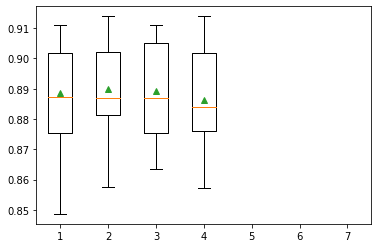

In [37]:
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import  matplotlib.pyplot as plt

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=666)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
# Define dataset
X,y = X, y3

# get the models to evaluate
models = get_models()

 # evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### 2.5 Explore the Tree Depth

>1 0.682 (0.018)
>2 0.783 (0.023)
>3 0.837 (0.018)
>4 0.853 (0.016)
>5 0.866 (0.018)
>6 0.874 (0.016)
>7 0.879 (0.016)
>None 0.890 (0.014)


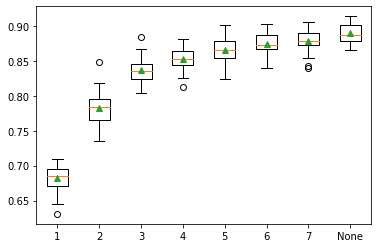

In [38]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=666)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = X, y3
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Summarize

In [34]:
# Define the model
model = RandomForestClassifier()
# Evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state = 666)
n_scores = cross_val_score(model, X, y3, scoring='accuracy',cv=cv, n_jobs=-1,error_score='raise')
# Report Performance
print(mean(n_scores))

0.8903395977579954


## 3. SVM – One Vs. One for multi-classification

### 3.1 Basic

In [35]:
from sklearn.svm import SVC
svm_classifier = SVC(decision_function_shape = 'ovo')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

### 3.2 Train on different kernels

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y3,train_size=0.8, random_state=666)

# Apply different kernel functions
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma = 1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree = 3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

# Prediction
linear_pre = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

# Retrive the accuracy and print 
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)

print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

# Cross-validation
from sklearn.model_selection import cross_val_score
print(cross_val_score(rbf, X_train, y_train, cv=5))

Accuracy Linear Kernel: 0.8647845468053492
Accuracy Polynomial Kernel: 0.8038632986627043
Accuracy Radial Basis Kernel: 0.9034175334323923
Accuracy Sigmoid Kernel: 0.5824665676077266
[0.89795918 0.90723562 0.92193309 0.91078067 0.92379182]


# Reference
1. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

2. https://machinelearningmastery.com/random-forest-ensemble-in-python/

3. https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

